# **COMP-3703 (241551) Introduction to Artificial Intelligence**
# **Project 3 - Text Classification-Spam and Ham and TF-IDF**
# **Felix Cazarez**

**Objective:**
* Successfully implement a spam classifier to the YouTube comments from 5 different YouTube videos,
* Create code to calculate TF-IDF scores for a list of sentences.

**Instructions:**

From the UCI ML Repository, you will need the following files:

https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection

# Task 1: Data Exploration

## 1.1 The Data
* Read in the Psy file to your Jupyter Notebook.** (1 point)
* Display the head and tail of the file.** (1 point)
* Give the number of rows in the file.** (1 point)
* Display the number of spam and ham comments for the file.** (2 points)
* Discuss the balance of the dataset and the balance of the classes spam/ham. Based on this, what sort of classifiers are appropriate for the task?** (3 marks)

In [151]:
# import libraries

import math
import matplotlib.pyplot as plt
import pandas as pd
import re


from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer
    )
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import (
     train_test_split,
     cross_val_score,
     GridSearchCV
     )
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

import seaborn as sns

In [152]:
git_url_psy = 'https://raw.githubusercontent.com/Fcazarez/RRC3_IntroAI_Project3_Text_Classification_Spam/main/Youtube01-Psy.csv'
df_psy = pd.read_csv (git_url_psy)
print("Head of the psy dataframe: ") 
df_psy.head()


Head of the psy dataframe: 


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [153]:
print("Tail of the psy dataframe: ") 
df_psy.tail()

Tail of the psy dataframe: 


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1
349,z13vhvu54u3ewpp5h04ccb4zuoardrmjlyk0k,Ray Benich,2015-06-05T18:05:16,The first billion viewed this because they tho...,0


In [154]:
num_rows = df_psy.shape[0]
print("Number of rows psy dataframe:", num_rows)

Number of rows psy dataframe: 350


In [155]:
# Count the number of spam and ham comments
spam_count = df_psy[df_psy['CLASS'] == 1].shape[0]
ham_count = df_psy[df_psy['CLASS'] == 0].shape[0]

# Display the counts
print(f"Number of Spam Comments: {spam_count}")
print(f"Number of Ham Comments: {ham_count}")


Number of Spam Comments: 175
Number of Ham Comments: 175


**Comments:**

Ham and spam are perfectly balanced, we can say the data is good to go for modelling since the training stage will not have bias and the chosen model can be less complex. The classifiers suitable for this balanced dataset include:

* Logistic Regression: This classifier is a good starting point and tends to work well for balanced datasets.

* Decision Trees: Decision trees can handle balanced datasets effectively and are capable of capturing complex relationships in the data.

* Random Forests: This ensemble method, which consists of multiple decision trees, can provide robust performance and handle both numerical and categorical features well.

* Support Vector Machines (SVM): SVMs can work effectively for balanced datasets and are capable of handling high-dimensional feature spaces.

* K-Nearest Neighbors (KNN): KNN is a simple and effective algorithm for classification, and it tends to work well when the dataset is balanced.

## 1.2 Data Transformation
* Create a bag-of-words for the Psy file. The fit and transform should be done on the ‘CONTENT’ of your data.** (2 points)
* Display the matrix information. For example.** (2 points)
* How many different words are in your bag of words?** (1 point)
* Display the 349th comment in the Psy file.** (2 points)
* Using ’analyze’ ,or something similar, give the breakdown of the 349th comment.** (2 points)

In [156]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the CountVectorizer
content_data = df_psy['CONTENT'].tolist()

# Create the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'CONTENT' data into a bag-of-words matrix
bow_matrix = vectorizer.fit_transform(content_data)

# Display the matrix information
print("Bag-of-Words Matrix Information:")
print(f"Shape: {bow_matrix.shape}")
print(f"Number of different words: {len(vectorizer.get_feature_names_out())}")

# Display the 349th comment in the Psy file
comment_349 = content_data[348]  # Indexing starts from 0
print("=="*30)
print(f"\n349th Comment:\n{comment_349}")

# Using 'analyze' or similar, give the breakdown of the 349th comment
analyze_result = vectorizer.build_analyzer()(comment_349)
print(f"\nBreakdown of 349th Comment: {analyze_result}")


Bag-of-Words Matrix Information:
Shape: (350, 1418)
Number of different words: 1418

349th Comment:
hi guys please my android photo editor download. thanks https://play.google.com/store/apps/details?id=com.butalabs.photo.editor﻿

Breakdown of 349th Comment: ['hi', 'guys', 'please', 'my', 'android', 'photo', 'editor', 'download', 'thanks', 'https', 'play', 'google', 'com', 'store', 'apps', 'details', 'id', 'com', 'butalabs', 'photo', 'editor']


# 2. Training and Testing Sets
* Shuffle your dataset(frac=1).** (1 point)
* Create your training and testing splits by using the first 300 entries for training and the remaining for testing. Name them appropriately.** (3 points)
* Create your training and testing attributes BOW. Name them appropriately.** (2 points)
* Create your training and testing labels. Name them appropriately.** (2 points)
* Output the matrix information of d_train_att and d_test_att. What are the dimensions of the matrices?** (3 points)

In [157]:
bow_matrix.shape


(350, 1418)

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Shuffle your dataset
df_psy_shuffled = df_psy.sample(frac=1, random_state=42)

X = df_psy_shuffled['CONTENT']
y = df_psy_shuffled['CLASS']

# Create training and testing splits
X_train, X_test, y_train, y_test = train_test_split(
    X,                          # Features
    y,                          # Labels
    test_size=50,               # Adjust the test size as needed
    random_state=42
)

#verifying shapes
print("Shape of X_train (Features):", X_train.shape)
print("Shape of X_test (Features):", X_test.shape)
print("Shape of y_train (Labels):", y_train.shape)
print("Shape of y_test (Labels):", y_test.shape)

# Create bag-of-words for training and testing data
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
#X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)


# Output matrix information
print("Matrix Information for Training Data (d_train_att):")
print(f"Shape: {X_train_bow.shape}")

print("\nMatrix Information for Testing Data (d_test_att):")
print(f"Shape: {X_test_bow.shape}")


Shape of X_train (Features): (300,)
Shape of X_test (Features): (50,)
Shape of y_train (Labels): (300,)
Shape of y_test (Labels): (50,)
Matrix Information for Training Data (d_train_att):
Shape: (300, 1262)

Matrix Information for Testing Data (d_test_att):
Shape: (50, 1262)


# 3. Random Forest Classifier
* Implement a Random Forest classifier. With 50 trees, output.** (3 points)
* Train the classifier on the training data and test its performance on the testing data.** (2 points)
* Print the training and testing accuracies.** (2 points)
* Cross validate using 3 folds. Output the accuracies of the folds.** (3 points)
* Generate a confusion matrix for the Random Forest classifier's predictions on the test data.** (3 points)
* Visualize this matrix (you may need to implement or use a utility function for visualization).** (3 points)

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Implement a Random Forest classifier with 50 trees
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_bow, y_train)

# Test the classifier on the testing data
y_pred_test = rf_classifier.predict(X_test_bow)

# Print the training and testing accuracies
#train_accuracy = accuracy_score(y_train, rf_classifier.predict(X_train_bow))
#test_accuracy = accuracy_score(y_test, y_pred_test)

# training accuracy
train_accuracy = rf_classifier.score(X_train_bow, y_train)
# test accuracy
test_accuracy = rf_classifier.score(X_test_bow, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)



Training Accuracy: 1.0
Testing Accuracy: 0.9


In [160]:
# Cross validate using 3 folds and output the accuracies of the folds
cross_val_accuracies = cross_val_score(rf_classifier, X_train_bow, y_train, cv=3)
print("Cross-Validation Accuracies:", cross_val_accuracies)
print("------------------------Cross-Validation Accuracies with 3 Folds:")

#itatate to show the three folds
for fold, accuracy in enumerate(cross_val_accuracies, 1):
    print(f"Fold {fold}: {accuracy:.4f}")

Cross-Validation Accuracies: [0.93 0.98 0.97]
------------------------Cross-Validation Accuracies with 3 Folds:
Fold 1: 0.9300
Fold 2: 0.9800
Fold 3: 0.9700


Confusion Matrix:
 [[27  0]
 [ 5 18]]


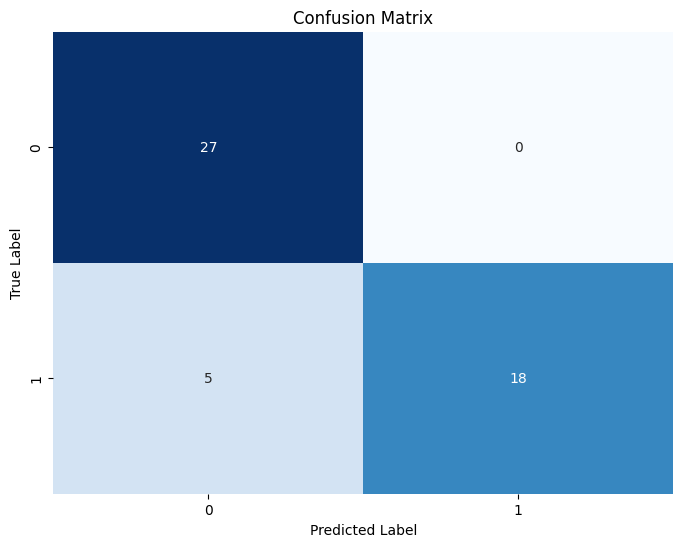

In [161]:
# Generate a confusion matrix for the Random Forest classifier's predictions on the test data
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 4. Pipeline Data
* Concatenate your 5 files into one using .concat.** (3 points)
* Provided you have concatenated the files correctly the length of your new file should be close to 2000. Output the length.** (1 point)
* Check the spam-to-ham ratio in the new file; they should be balanced- about 1000 each. Output the number of spams and the number of hams.** (2 points)
* Shuffle the new data and create content and label sets, and name them appropriately.** (3 points)

In [162]:
git_url_psy = 'https://raw.githubusercontent.com/Fcazarez/RRC3_IntroAI_Project3_Text_Classification_Spam/main/Youtube01-Psy.csv'
df_psy = pd.read_csv (git_url_psy)
git_url_kate = 'https://raw.githubusercontent.com/Fcazarez/RRC3_IntroAI_Project3_Text_Classification_Spam/main/Youtube02-KatyPerry.csv'
df_kate = pd.read_csv (git_url_kate)
git_url_lmfao = 'https://raw.githubusercontent.com/Fcazarez/RRC3_IntroAI_Project3_Text_Classification_Spam/main/Youtube03-LMFAO.csv'
df_lmfao = pd.read_csv (git_url_lmfao)
git_url_eminem = 'https://raw.githubusercontent.com/Fcazarez/RRC3_IntroAI_Project3_Text_Classification_Spam/main/Youtube04-Eminem.csv'
df_eminem = pd.read_csv (git_url_eminem)
git_url_shakira = 'https://raw.githubusercontent.com/Fcazarez/RRC3_IntroAI_Project3_Text_Classification_Spam/main/Youtube05-Shakira.csv'
df_shakira = pd.read_csv (git_url_shakira)

In [163]:
len(df_psy), len(df_kate), len(df_lmfao), len(df_eminem), len(df_sharika)

(350, 350, 438, 448, 370)

In [164]:
import pandas as pd

# List of all DataFrames
all_dataframes = [df_psy, df_kate, df_lmfao, df_eminem, df_shakira]

# Concatenate into one DataFrame
concat_df = pd.concat(all_dataframes, ignore_index=True)
concat_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 76.5+ KB


In [165]:
len_concat = len(concat_df)

print("Length of the concatenated file:", len_concat)

Length of the concatenated file: 1956


In [166]:
spam_count = concat_df['CLASS'].value_counts()[1]
ham_count = concat_df['CLASS'].value_counts()[0]
total_comments = len(concat_df)

print("Number of Spam comments in concat df:", spam_count)
print("Number of Ham comments in concat df:", ham_count)

# Calculate and print the spam-to-ham ratio
spam_to_ham_ratio = spam_count / ham_count
print("Spam-to-Ham Ratio:", spam_to_ham_ratio)

# Calculate and print the spam proportion as a percentage with 2 decimal places
spam_proportion = (spam_count / total_comments) * 100
print("Spam Proportion:", "{:.2f}%".format(spam_proportion))



Number of Spam comments in concat df: 1005
Number of Ham comments in concat df: 951
Spam-to-Ham Ratio: 1.0567823343848581
Spam Proportion: 51.38%


In [167]:
# Shuffle the concatenated DataFrame
shuffled_df = shuffle(concat_df, random_state=42)

# Create content and label sets
X_features = shuffled_df['CONTENT']
y_labels = shuffled_df['CLASS']

# Verify shapes
print("Shape of content_set:", X_features.shape)
print("Shape of label_set:", y_labels.shape)


Shape of content_set: (1956,)
Shape of label_set: (1956,)


# 5. Pipeline Creation
* Read the sci-kit learn documentation on Pipelines. Name 3 advantages to using a pipeline. You can use any reference you wish to answer this question, just be sure to include the reference in your response.** (5 points)
* Create a two-step pipeline with a bag-of-words step and a random forest step.** (3 points)
* Output the pipeline to display its steps.** (1 point)
* Fit your pipeline with the first 1500 entries of the content and labels. Output.** (3 points)
* Use .score to score your pipeline.** (2 points)
* Use your pipeline to predict whether the following two comments are spam or ham.** (5 points)
   1. "what a neat video"
   2. "plz subscribe to my channel"
* Cross-validate using your pipeline. Use cv=3. Print out the accuracies.** (3 points)

## 🚀 Advantages of Using Machine Learning Pipelines

1. **Convenience and Simplicity:** Pipelines streamline the complexity of machine learning workflows, consolidating preprocessing, feature engineering, and model training into a single, cohesive structure. This enhances code readability and maintainability, offering a convenient way to manage intricate tasks and evolving models (Müller and Guido, 2016).

2. **Prevents Data Leakage:** Data leakage, the bane of model evaluation, is mitigated by pipelines. They ensure consistent application of preprocessing steps to both training and testing data, promoting fair model assessments. Carefully sequencing preprocessing within the pipeline is key to preventing unintentional information flow during training (Pedregosa et al., 2011).

3. **Ease of Deployment and Reproducibility:** Pipelines facilitate seamless deployment and reproducibility, encapsulating the entire workflow from data preprocessing to model training. This enables easy serialization and deployment, ensuring production environments mirror development accurately. By embracing pipelines, achieve reproducibility in deployment and simplify collaboration through a standardized representation of the machine learning process (Géron, 2019).

4. **Efficiency:** A machine learning pipeline is an automated sequence of processes that enables data to flow from its raw state to one that is refined and valuable for machine learning models¹. This brings order and efficiency to what could otherwise be a chaotic process¹.

5. **Consistency:** Pipelines ensure that the same sequence of transformations is applied to the data every time, which is crucial for the reproducibility of experiments¹. This consistency is particularly important when using machine learning to make predictions or classifications based on new data¹.

6. **Scalability:** Machine learning pipelines are iterative as every step is repeated to continuously improve the accuracy of the model and achieve a successful algorithm². This makes the model scalable, as it can handle larger datasets and more complex transformations².

7. **Reproducibility and Collaboration:** A well-constructed machine learning pipeline offers a host of benefits, making it a powerful tool for any data scientist or AI engineer¹. Its core advantages are tied to efficiency, consistency, scalability, reproducibility, and collaboration¹.

8. **Control:** The main objective of having a proper pipeline for any ML model is to exercise control over it. A well-organised pipeline makes the implementation more flexible².

9. **Real-time Processing and Increased Privacy:** ML pipeline ensures smooth functioning of ML inference at edge level devices where the data generation plays a crucial part and offers features like lower cost, real-time processing, and increased privacy³.

🌐 In summary, machine learning pipelines offer a powerful toolkit to organize code, prevent common pitfalls, and simplify deployment.

**References:**
- (1) [Machine Learning Pipelines: Benefits, Challenges, Use Cases](https://plat.ai/blog/machine-learning-pipeline/).
- (2) [What is a Pipeline in Machine Learning? How to create one?](https://medium.com/analytics-vidhya/what-is-a-pipeline-in-machine-learning-how-to-create-one-bda91d0ceaca).
- (3) [An overview of Machine Learning pipeline and its importance](https://www.design-reuse.com/articles/53595/an-overview-of-machine-learning-pipeline-and-its-importance.html).

In [168]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

# Define the steps for the pipeline
steps = [
    ('bow', CountVectorizer()),        # Step 1: Bag-of-Words
    ('rf', RandomForestClassifier())   # Step 2: Random Forest Classifier
]

print("Steps for the pipeline:", steps)


# Create the pipeline
pipeline = Pipeline(steps)

# Now you can use the pipeline for fitting and predicting
# For example, to fit the pipeline on your training data:
# pipeline.fit(X_train, y_train)

# And to make predictions on new data:
# predictions = pipeline.predict(X_test)


Steps for the pipeline: [('bow', CountVectorizer()), ('rf', RandomForestClassifier())]


In [169]:
# Assuming you have X_train and y_train from your data
X_features_subset = X_features[:1500]
y_labels_subset = y_labels[:1500]
print("Shape of X_train_subset:", X_features_subset.shape)
print("Shape of y_train_subset:", y_labels_subset.shape)

# Fit the pipeline with the first 1500 entries
pipeline.fit(X_features_subset, y_labels_subset)


Shape of X_train_subset: (1500,)
Shape of y_train_subset: (1500,)


Pipeline(steps=[('bow', CountVectorizer()), ('rf', RandomForestClassifier())])

In [170]:
# Assuming you have X_test and y_test from your data
score = pipeline.score(X_test, y_test)

# Print the accuracy score
print("Accuracy Score:", score)


Accuracy Score: 1.0


In [171]:
# List new_comments
new_comments = [
    "what a neat video", 
    "plz subscribe to my channel"
    ]

# Use the pipeline to predict
predictions = pipeline.predict(new_comments)

# Print the predictions
for comment, prediction in zip(new_comments, predictions):
    print(f"Comment: '{comment}' - Predicted Class: {'Spam' if prediction == 1 else 'Ham'}")

# Create a DataFrame
df_predictions = pd.DataFrame({
    'Comment': new_comments,
    'Predicted Class': [ 'Spam' if prediction == 1 else 'Ham' for prediction in predictions]
})

# Display the DataFrame
df_predictions


Comment: 'what a neat video' - Predicted Class: Ham
Comment: 'plz subscribe to my channel' - Predicted Class: Spam


,Comment,Predicted Class
0,what a neat video,Ham
1,plz subscribe to my channel,Spam


In [172]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with the pipeline
cv_scores = cross_val_score(
    pipeline, 
    X_features_subset, 
    y_labels_subset, 
    cv=3, 
    scoring="accuracy"
    )

# Print out the accuracies
for fold, accuracy in enumerate(cv_scores, 1):
    print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

# Print the average accuracy
print(f"\nAverage Accuracy: {cv_scores.mean():.4f}")


Fold 1: Accuracy = 0.9400
Fold 2: Accuracy = 0.9500
Fold 3: Accuracy = 0.9580

Average Accuracy: 0.9493


# 6. Pipeline 2 Creation
* Create a second pipeline named pipeline2 which includes a TfidfTransformer step.** (3 points)
* Cross validate pipeline2 with 3 folds. Output the accuracy.** (3 points)
* Use the following parameter dictionary to perform a grid search.** (3 points)


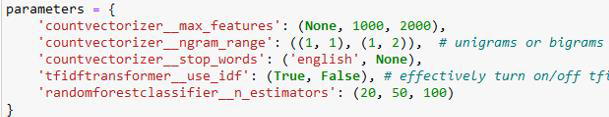

* Perform the grid search, you can reduce n_estimators to 2 values and max_features to 1000 and 2000 to speed things up.** (3 points)
* Print out the best parameter settings.** (1 point)

In [173]:
from sklearn.feature_extraction.text import TfidfTransformer

# Define the steps for the second pipeline
steps_pipeline2 = [
    ('bow', CountVectorizer()),           # Step 1: Bag-of-Words
    ('tfidf', TfidfTransformer()),        # Step 2: TF-IDF Transformation
    ('rf', RandomForestClassifier())      # Step 3: Random Forest Classifier
]

# Create the second pipeline (pipeline2)
pipeline2 = Pipeline(steps_pipeline2)


In [174]:
from sklearn.model_selection import cross_val_score

# Define the number of folds
num_folds = 3

# Perform cross-validation with pipeline2
cv_scores_pipeline2 = cross_val_score(
    pipeline2, 
    X_features_subset, 
    y_labels_subset, 
    cv=num_folds,
    scoring='accuracy'
    )

# Print out the accuracies
for fold, accuracy in enumerate(cv_scores_pipeline2, 1):
    print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

# Print the average accuracy
print(f"\nAverage Accuracy: {cv_scores_pipeline2.mean():.4f}")

import pandas as pd

# Create a DataFrame for the accuracies of pipeline2
df_accuracies_pipeline2 = pd.DataFrame({
    'Fold': range(1, num_folds + 1),
    'Accuracy': cv_scores_pipeline2
})

# Display the DataFrame
df_accuracies_pipeline2



Fold 1: Accuracy = 0.9400
Fold 2: Accuracy = 0.9460
Fold 3: Accuracy = 0.9520

Average Accuracy: 0.9460


,Fold,Accuracy
0,1,0.940
1,2,0.946
2,3,0.952


In [75]:
# Define the parameter dictionary
parameters = {
    'bow__max_features': [None, 1000, 2000],  # 'bow' is the name of CountVectorizer step
    'bow__ngram_range': [(1, 1), (1, 2)],
    'bow__stop_words': ['english', None],
    'tfidf__use_idf': [True, False],  # 'tfidf' is the name of TfidfTransformer step
    'rf__n_estimators': [20, 50]  # 'rf' is the name of RandomForestClassifier step
}

# Create GridSearchCV instance
grid_search = GridSearchCV(
    pipeline2, 
    parameters, 
    cv=3, 
    scoring='accuracy'
)

# Perform the grid search
grid_search.fit(X, y)

# get best params and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameter settings
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'bow__max_features': 2000, 'bow__ngram_range': (1, 1), 'bow__stop_words': None, 'rf__n_estimators': 50, 'tfidf__use_idf': True}
Best Score: 0.9599665978976324


In [79]:
import pandas as pd


# Create a DataFrame
df_best_params = pd.DataFrame(list(best_params.items()), columns=['Parameter', 'Value'])


print("Best Score: {:.4%}".format(best_score))
# Display the DataFrame
df_best_params


Best Score: 95.9967%


,Parameter,Value
0,bow__max_features,2000
1,bow__ngram_range,"(1, 1)"
2,bow__stop_words,None
3,rf__n_estimators,50
4,tfidf__use_idf,True


# 7. TF Calculation
Write python code that takes as an input a list of sentences and outputs the TF for every term in every sentence. (7 points)

**Input:** list of sentences

**Output:** the term frequency for every word in every sentence

**Test Cases:**
```python
sentences = [
    "Python is a great programming language",
    "Python can be used for a wide variety of programming tasks",
    "It's easy to learn Python"
]
sentences = ["I love math", "Math is great", "Math rules"]


In [92]:
import re
from collections import Counter

def tokenize_sentence(sentence):
    # Tokenize the sentence and apply regex to split and remove punctuation
    words = re.findall(r'\w+', sentence.lower())
    return words

def calculate_tf(sentences):
    term_frequency = []

    for sentence in sentences:
        # Tokenize each sentence and calculate term frequency
        words = tokenize_sentence(sentence)
        tf = Counter(words)
        term_frequency.append(tf)
    return term_frequency

def output_term_frequency(sentences, set_name):
    term_frequency = calculate_tf(sentences)
    print(f"{set_name}:")

    for i, tf in enumerate(term_frequency, 1):
        # Display term frequency for each sentence in the set
        print(f"================ Term Frequency for Sentence {i}: =================")
        for term, frequency in tf.items():
            print(f"{term}: {frequency}")
        print()

def create_dataframe(sentences, set_name):
    term_frequency_list = calculate_tf(sentences)
    data = []

    for i, tf in enumerate(term_frequency_list, 1):
        # Create a list of dictionaries for each sentence
        sentence_data = [{"Term": term, "Frequency": frequency, "Sentence": f"Sentence {i}"} 
                         for term, frequency in tf.items()]
        data.extend(sentence_data)

    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(data)
    return df


In [90]:
print ("Sentences 1:")
sentences_1

Sentences 1:


['Python is a great programming language',
 'Python can be used for a wide variety of programming tasks',
 "It's easy to learn Python"]

In [94]:
df_set_1 = create_dataframe(sentences_1, "Sentences Set 1")
df_set_1

,Term,Frequency,Sentence
0,python,1,Sentence 1
1,is,1,Sentence 1
2,a,1,Sentence 1
3,great,1,Sentence 1
4,programming,1,Sentence 1
5,language,1,Sentence 1
6,python,1,Sentence 2
7,can,1,Sentence 2
8,be,1,Sentence 2
9,used,1,Sentence 2


In [87]:
print ("Sentences 2:")
sentences_2

Sentences 2:


['I love math', 'Math is great', ' Math rules']

In [96]:
df_set_2 = create_dataframe(sentences_2, "Sentences Set 2")
df_set_2

,Term,Frequency,Sentence
0,i,1,Sentence 1
1,love,1,Sentence 1
2,math,1,Sentence 1
3,math,1,Sentence 2
4,is,1,Sentence 2
5,great,1,Sentence 2
6,math,1,Sentence 3
7,rules,1,Sentence 3


# 8. IDF Calculation

Write Python code that calculates the inverse document frequency for a list of sentences.

## Inputs
- List of sentences

## Outputs
- Inverse document frequency for each word in the list of sentences.

## Test Cases
```python
sentences_1 = [
    "Python is a great programming language",
    "Python can be used for a wide variety of programming tasks",
    "It's easy to learn Python"
]

sentences_2 = [
    "I love math",
    "Math is great",
    " Math rules"
]


In [121]:
# Test Cases
sentences_1 = [
    "Python is a great programming language",
    "Python can be used for a wide variety of programming tasks",
    "It's easy to learn Python"
]

sentences_2 = [
    "I love math",
    "Math is great",
    " Math rules"
]

In [ ]:
def calculate_idf(sentences):
    words_in_sentences = set()
    for sentence in sentences:
        words = tokenize_sentence(sentence)
        words_in_sentences.update(words)

    idf = {}
    total_sentences = len(sentences)

    for word in words_in_sentences:
        sentences_containing_word = sum(1 for sentence in sentences if word in tokenize_sentence(sentence))
        idf[word] = math.log(total_sentences / (sentences_containing_word + 1))

    return idf

def output_idf(sentences, set_name):
    idf = calculate_idf(sentences)

    print(f"{set_name}:")
    for i, sentence in enumerate(sentences, 1):
        print(f"--------------------IDF for Sentence {i}:")
        words = tokenize_sentence(sentence)
        for word in words:
            print(f"'{word}': {idf[word]}")
        print()



# calculate and print frequency for set_1
output_idf(sentences_1, "Sentences Set 1")
df_set_1 = create_dataframe(sentences_1, "Sentences Set 1")
df_set_1

# calculate and print frequency for set_2
output_idf(sentences_2, "Sentences Set 2")
df_set_2 = create_dataframe(sentences_2, "Sentences Set 2")
df_set_2

In [ ]:
def create_dataframe(sentences, set_name):
    term_frequency_list = calculate_tf(sentences)
    data = []

    for i, tf in enumerate(term_frequency_list, 1):
        # Create a list of dictionaries for each sentence
        sentence_data = [{"Term": term, "Frequency": frequency, "Sentence": f"Sentence {i}"} 
                         for term, frequency in tf.items()]
        data.extend(sentence_data)

    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(data)
    return df

In [147]:
import math
import pandas as pd

def calculate_idf(sentences):
    words_in_sentences = set()
    sentence_word_count = {}

    # Collect unique words and count their occurrences in each sentence
    for i, sentence in enumerate(sentences, 1):
        words = tokenize_sentence(sentence)
        words_in_sentences.update(words)
        sentence_word_count[i] = Counter(words)

    idf = {}
    total_sentences = len(sentences)

    # Calculate IDF scores for each word
    for word in words_in_sentences:
        sentences_containing_word = sum(1 for sentence_count in sentence_word_count.values() if word in sentence_count)
        idf[word] = math.log(total_sentences / (sentences_containing_word + 1))

    return idf

def output_idf(sentences, set_name):
    idf = calculate_idf(sentences)

    print(f"{set_name}:")
    for i, sentence in enumerate(sentences, 1):
        print(f"|-------------------------IDF for Sentence {i}: -------------------------|")
        words = tokenize_sentence(sentence)
        for word in words:
            print(f"|'{word}': {idf[word]}")
        print(f"|----------------------------------------------------------------------|")
        print()

In [148]:
# Calculate and print IDF for Sentences Set 1
output_idf(sentences_1, "Sentences Set 1")


Sentences Set 1:
|-------------------------IDF for Sentence 1: -------------------------|
|'Python': -0.2876820724517809
|'is': 0.4054651081081644
|'a': 0.0
|'great': 0.4054651081081644
|'programming': 0.0
|'language': 0.4054651081081644
|----------------------------------------------------------------------|

|-------------------------IDF for Sentence 2: -------------------------|
|'Python': -0.2876820724517809
|'can': 0.4054651081081644
|'be': 0.4054651081081644
|'used': 0.4054651081081644
|'for': 0.4054651081081644
|'a': 0.0
|'wide': 0.4054651081081644
|'variety': 0.4054651081081644
|'of': 0.4054651081081644
|'programming': 0.0
|'tasks': 0.4054651081081644
|----------------------------------------------------------------------|

|-------------------------IDF for Sentence 3: -------------------------|
|'It's': 0.4054651081081644
|'easy': 0.4054651081081644
|'to': 0.4054651081081644
|'learn': 0.4054651081081644
|'Python': -0.2876820724517809
|------------------------------------------

In [149]:
# Calculate and print IDF for Sentences Set 2
output_idf(sentences_2, "Sentences Set 2")


Sentences Set 2:
|-------------------------IDF for Sentence 1: -------------------------|
|'I': 0.4054651081081644
|'love': 0.4054651081081644
|'math': 0.4054651081081644
|----------------------------------------------------------------------|

|-------------------------IDF for Sentence 2: -------------------------|
|'Math': 0.0
|'is': 0.4054651081081644
|'great': 0.4054651081081644
|----------------------------------------------------------------------|

|-------------------------IDF for Sentence 3: -------------------------|
|'Math': 0.0
|'rules': 0.4054651081081644
|----------------------------------------------------------------------|

